# Telecom Churn Prediction | Decision Tree Classifier

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.set_option('display.max_columns', None)

## Load preprocessed data

In [3]:
df_preprocessed = pd.read_csv("../data/processed/preprocessed_telco.csv")

In [4]:
df_preprocessed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.013889,0.115423,0.003437,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.472222,0.385075,0.217564,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.027778,0.354229,0.012453,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0.625000,0.239303,0.211951,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0.027778,0.521891,0.017462,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [7]:
df_preprocessed.describe(include='all')

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497,0.504756,0.162147,0.483033,0.299588,0.903166,0.096834,0.421837,0.439585,0.216669,0.216669,0.286668,0.216669,0.344881,0.216669,0.343888,0.216669,0.290217,0.216669,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370
std,0.341104,0.299403,0.261007,0.500013,0.368612,0.499748,0.458110,0.295752,0.295752,0.493888,0.496372,0.412004,0.412004,0.452237,0.412004,0.475363,0.412004,0.475038,0.412004,0.453895,0.412004,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.402778,0.518408,0.160574,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.763889,0.712438,0.436003,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train test Split

In [8]:
y = df_preprocessed['Churn_Yes']
X = df_preprocessed.drop(columns=['Churn_Yes'])

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 30)
(1409, 30)
(5634,)
(1409,)


## Decision Tree Model

### Import and initialize model

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

### Training the model

In [16]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

### Checking the accuracy of testing dataset

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
predictions_test = dt_clf.predict(x_test)

In [19]:
dt_clf.score(x_test, y_test)

0.7374024130589071

### Checking the training accuracy

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
predictions_train = dt_clf.predict(x_train)
accuracy_score(y_train, predictions_train)

0.9984025559105432

By looking at the testing accuracy and the training accuracy we can see that the model has overfitted

### Visualizing decision tree

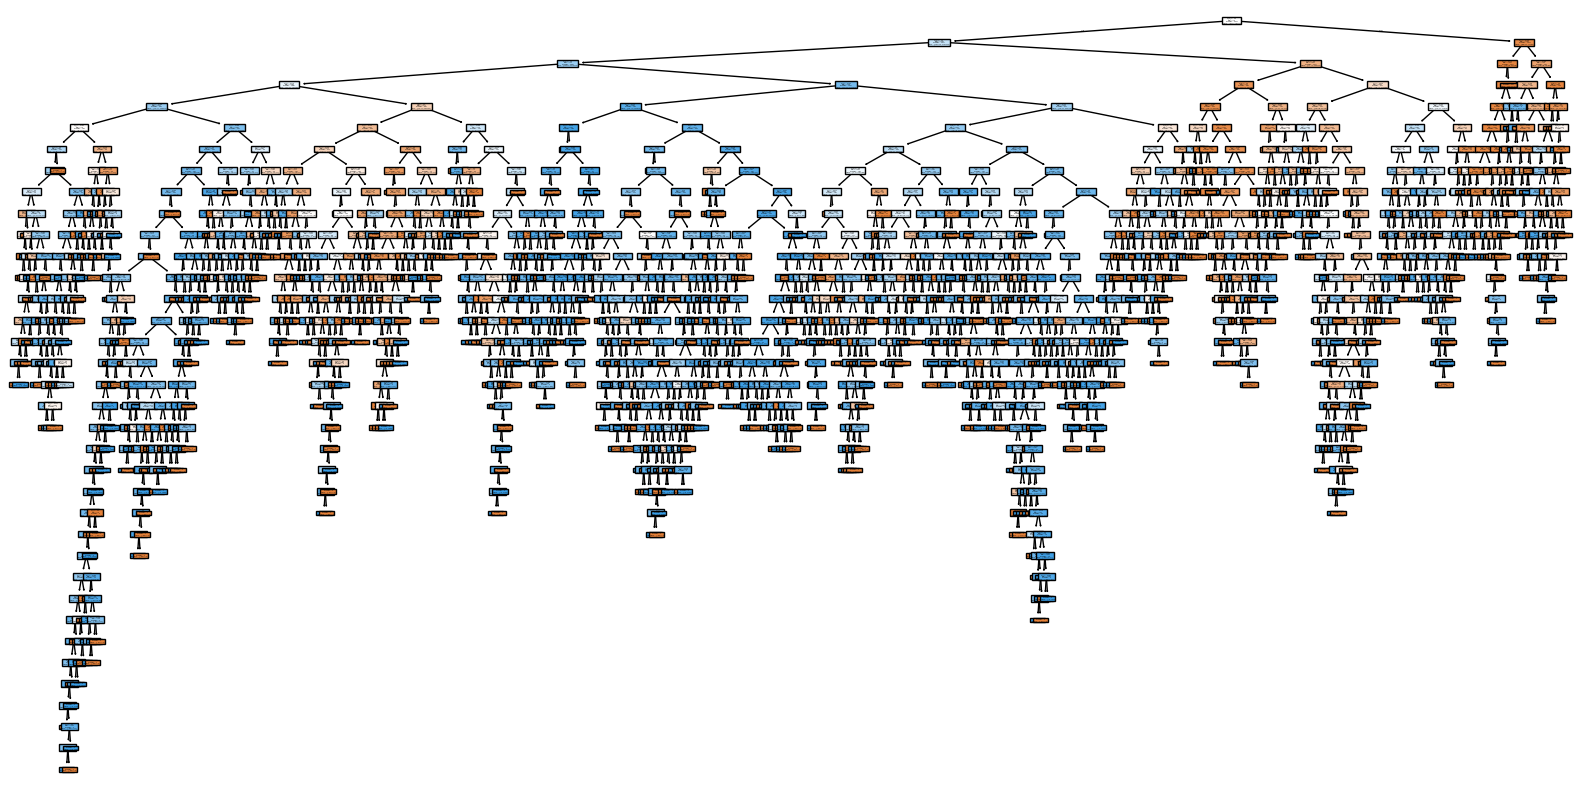

In [23]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_clf, filled=True)
plt.show()

## Model Evaluation

### Evaluating test dataset

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.50      0.50      0.50       373

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



In [26]:
confusion_matrix = confusion_matrix(y_test, predictions_test)
print(confusion_matrix)

[[853 183]
 [187 186]]


### Evaluating training dataset

In [27]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       0.99      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



### Finding false positive rate and true positive rate

In [28]:
from sklearn.metrics import roc_curve, auc

In [29]:
dt_probs = dt_clf.predict_proba(x_test)[:, 1]

In [30]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)

### Plotting ROC curve for the decision tree

In [31]:
auc_score_dt = auc(fpr_dt, tpr_dt)
auc_score_dt

np.float64(0.6614958025815935)

Since the AUC (Area Under the ROC Curve) is close to 0.5, the model is likely random guessing

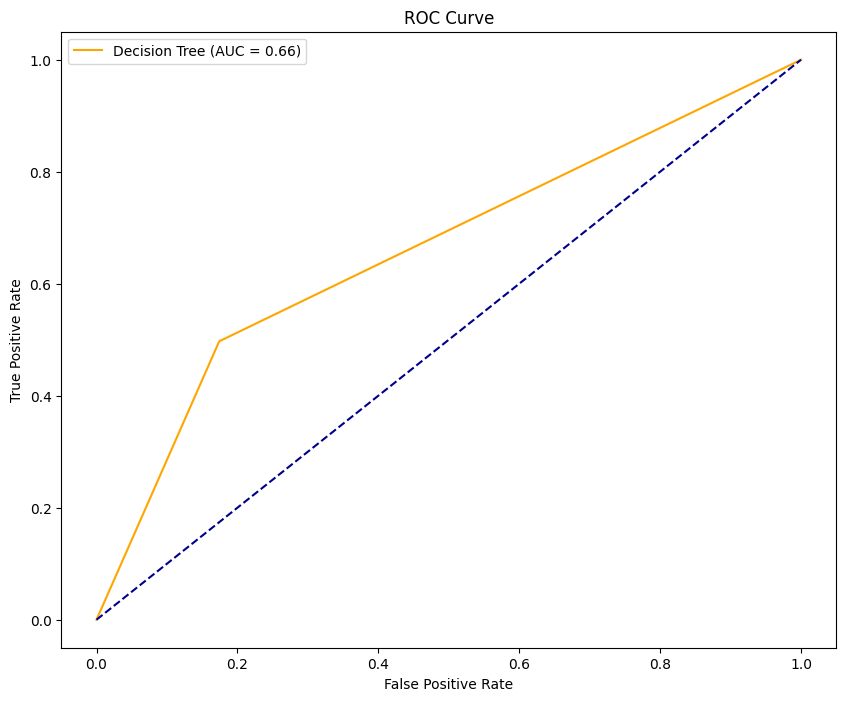

In [32]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt:.2f})', color='orange')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--') # diagonal line as the baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Pruning the Decision Tree

In [34]:
path = dt_clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Visualizing alpha with respect to impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs Effective alpha for training set')

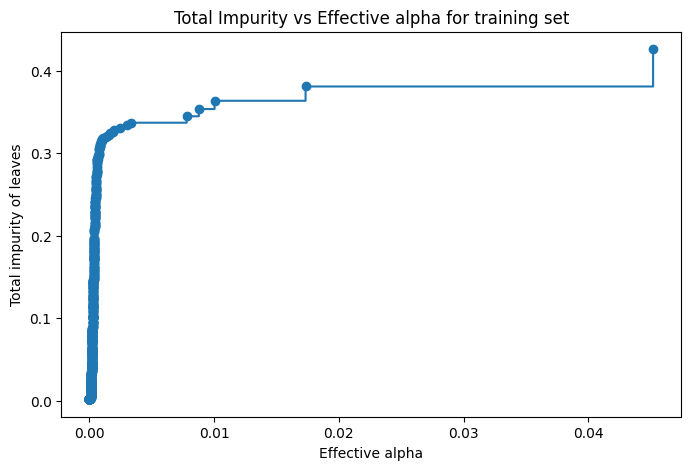

In [35]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o',drawstyle='steps-post')
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs Effective alpha for training set")

Findings of the graph


*   At very small alpha values, impurity is near 0 - therefore tree is complex, and almost perfectly fitting the training data (overfitting).
*   The impurity stabilizes around 0.35 to 0.4 for larger alpha values, this means the tree is simpler but leaves are less pure
* A good trade-off is around alpha = 0.01 to 0.02


In [36]:
dt_clfs = []
for ccp_alpha in ccp_alphas:
  dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  dt_clf.fit(x_train, y_train)
  dt_clfs.append(dt_clf)
print("Number of nodes in the last tree is : {} with ccp_alpha: {}".format(
    dt_clfs[-1].tree_.node_count, ccp_alphas[-1]
))

Number of nodes in the last tree is : 1 with ccp_alpha: 0.0740259103193886


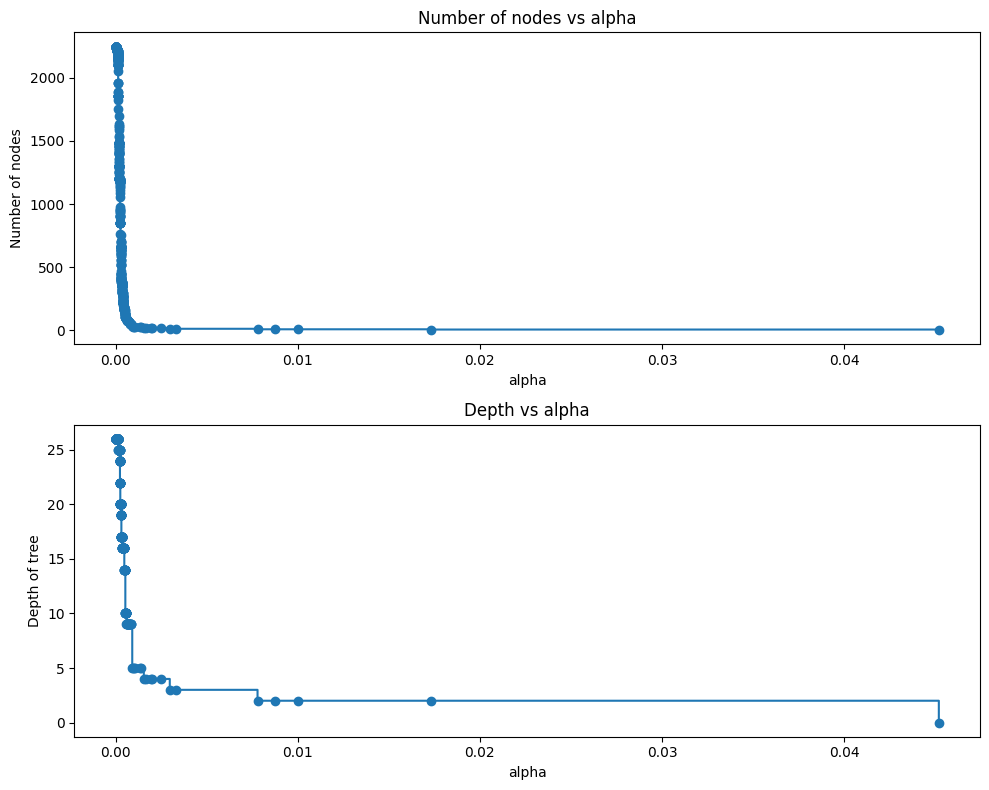

In [37]:
dt_clfs = dt_clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dt_clf.tree_.node_count for dt_clf in dt_clfs]
depth = [dt_clf.tree_.max_depth for dt_clf in dt_clfs]
fig, ax = plt.subplots(2,1, figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

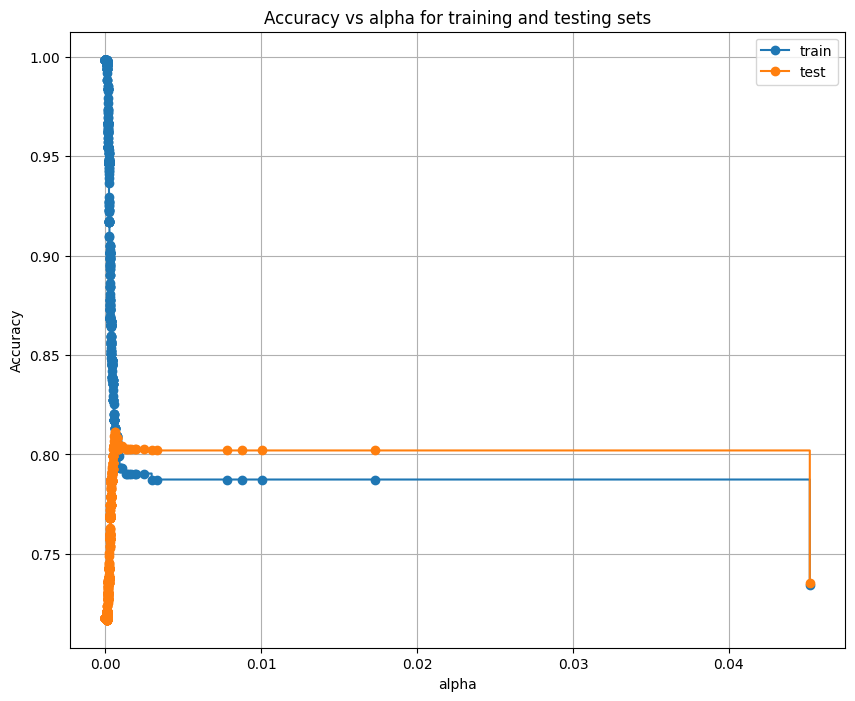

In [38]:
train_scores = [dt_clf.score(x_train, y_train) for dt_clf in dt_clfs]
test_scores = [dt_clf.score(x_test, y_test) for dt_clf in dt_clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

*   Best pruning point is around alpha 0.0005 to 0.0010
*   Before alpha 0.0005 the model overfits
*   After alpha 0.0010 the model underfits



### Selecting the best alpha with highest test accuracy

In [39]:
best_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_index]
best_test_acc = test_scores[best_index]
print(f"Best alpha: {best_alpha:.6f}, Test Accuracy: {best_test_acc:.4f}")

Best alpha: 0.000655, Test Accuracy: 0.8112


### Model after pruning

In [40]:
dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0006546784287600532),
                       random_state=42)

### Accuracy of test dataset

In [42]:
pred_test = dt_clf.predict(x_test)
accuracy_score(y_test, pred_test)

0.8112136266855926

### Accuracy of training dataset

In [43]:
pred_train = dt_clf.predict(x_train)
accuracy_score(y_train, pred_train)

0.8125665601703941

### Visualizing after pruning

[Text(0.54375, 0.95, 'x[0] <= 0.229\ngini = 0.39\nsamples = 5634\nvalue = [4138, 1496]'),
 Text(0.3125, 0.85, 'x[10] <= 0.5\ngini = 0.496\nsamples = 2025\nvalue = [1106, 919]'),
 Text(0.428125, 0.8999999999999999, 'True  '),
 Text(0.2125, 0.75, 'x[0] <= 0.049\ngini = 0.413\nsamples = 1165\nvalue = [825, 340]'),
 Text(0.125, 0.65, 'x[12] <= 0.5\ngini = 0.49\nsamples = 493\nvalue = [281, 212]'),
 Text(0.075, 0.55, 'x[1] <= 0.417\ngini = 0.498\nsamples = 299\nvalue = [141, 158]'),
 Text(0.05, 0.45, 'x[26] <= 0.5\ngini = 0.492\nsamples = 270\nvalue = [118, 152]'),
 Text(0.025, 0.35, 'gini = 0.498\nsamples = 124\nvalue = [66, 58]'),
 Text(0.075, 0.35, 'gini = 0.459\nsamples = 146\nvalue = [52, 94]'),
 Text(0.1, 0.45, 'gini = 0.328\nsamples = 29\nvalue = [23, 6]'),
 Text(0.175, 0.55, 'x[2] <= 0.003\ngini = 0.402\nsamples = 194\nvalue = [140, 54]'),
 Text(0.15, 0.45, 'gini = 0.456\nsamples = 128\nvalue = [83, 45]'),
 Text(0.2, 0.45, 'gini = 0.236\nsamples = 66\nvalue = [57, 9]'),
 Text(0.3, 0

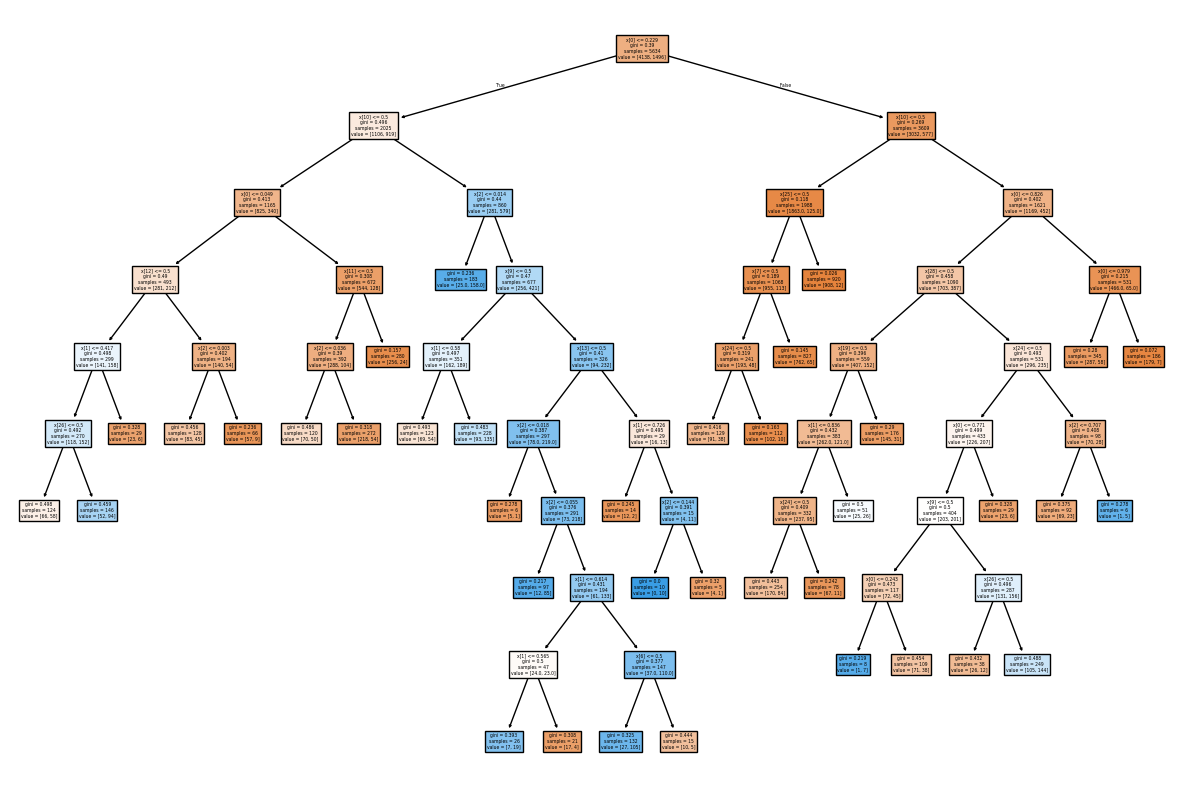

In [44]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True)

## Evaluating the new model

### Evaluating with the test dataset

In [45]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## Evaluating with the train dataset

In [46]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4138
           1       0.69      0.53      0.60      1496

    accuracy                           0.81      5634
   macro avg       0.77      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634



### Finding false positive rate and true positive rate

In [47]:
dt_probs = dt_clf.predict_proba(x_test)[:,1]

In [48]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)

### Plotting ROC curve for the new Decision Tree

In [49]:
auc_score_dt = auc(fpr_dt, tpr_dt)
auc_score_dt

np.float64(0.8418838696988831)

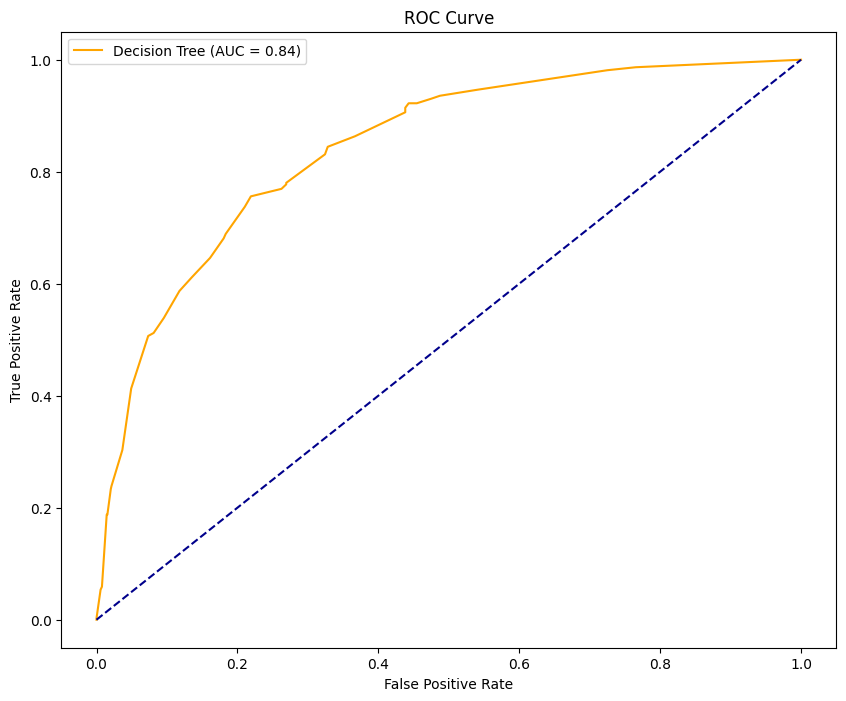

In [50]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt:.2f})', color='orange')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--') # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

After pruning there is a major peformance increase when making new predictions.

After pruning,

*   The model reduced overfitting
*   Maintained good accuracy (0.81)
*   Improved generalization
*   Smooth ROC curve and high AUC score (0.842)


Therefore the the model is simpler and reliable

